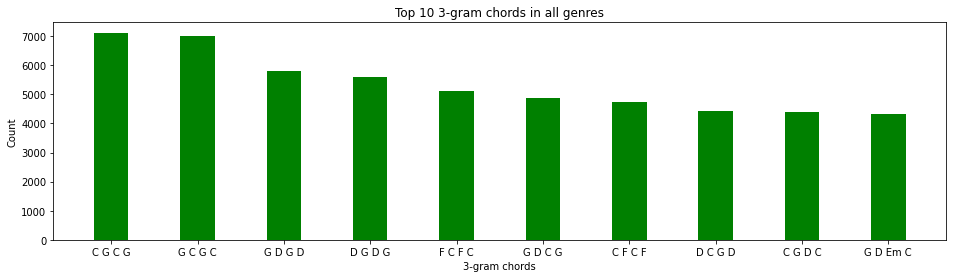

In [1]:
import pandas as pd
from collections import Counter
import re
import collections
import matplotlib.pyplot as plt

all_genres_en = pd.read_csv('data/all_genres_en.csv').drop(columns='Unnamed: 0')
all_genres_en

def convert_string_to_ngrams_list (chords_string, ngram = 4):
    """
    converts the list of chords to list of ngrams, each ngram is one list
    """
    in_bracket = False
    str = ''
    chords = []
    for i in chords_string:
        if in_bracket and i !='\'' :
            str += i
        if i == '\'' :
            in_bracket = not in_bracket
            if str != '' :
                chords.append(str)

            str = ''

    temp=zip(*[chords[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]

    return ans

all_genres_en['chords'] = all_genres_en['chords'].apply(convert_string_to_ngrams_list)
all_genres_en

#counting ngrams in ngrs_counter dictionary


ngrs_counter =collections.defaultdict(int)

for index, row in all_genres_en.iterrows():
    for ngram in row['chords']:
        #print(ngram)
        if ngram in ngrs_counter :
            ngrs_counter[ngram] +=1
        else:
            ngrs_counter[ngram] =1


#print(ngrs_counter)


#plotting a histogram

df_ngrs_counter=pd.DataFrame(sorted(ngrs_counter.items(),key=lambda x:x[1],reverse=True))
pd1bi=df_ngrs_counter[0][:10]
pd2bi=df_ngrs_counter[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("3-gram chords")
plt.ylabel("Count")
plt.title("Top 10 3-gram chords in all genres")
plt.savefig("positive-bigram.png")
plt.show()
